## Modeling

---

### Objective: 

This notebook will seek to build a classification model to predict the tumor diagnosis.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from pactools.grid_search import GridSearchCVProgressBar
from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical # only for multiclass problems

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.
/anaconda3/envs/dsi/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/anaconda3/envs/dsi/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/anaconda3/envs/dsi/lib/python3.6/site-packages/tensorflow/python/keras/backend.py:4900: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/surajsakaram/.keras/keras.json' mode='r' encoding='utf-8'>
  _config = json.load(open(_config_path))


## Load dataset

In [2]:
directory = '/Users/surajsakaram/GA_DSI/capstone/'
os.chdir(directory)

In [3]:
# Load dataset
df = pd.read_csv('./data/expression.csv')
df.head()

,Unnamed: 0,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,...,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b,Project ID
0,dc8d96ef-81eb-41c8-a486-02d107c1a137,3530.574305,3545.647914,3516.338118,13112.365384,1015.793793,380.189927,608.806338,1039.241630,981.459460,...,2.512268,0.000000,1.674845,2.512268,0.0,66.993820,42.708560,217.729914,27493.426231,TCGA-BRCA
1,93b8bab9-acd8-4a5a-b4ba-ec52b2ab186b,5860.628124,5770.822052,5873.585219,32816.747358,2379.637523,226.078969,395.861593,940.953178,928.442879,...,1.787186,0.000000,4.021167,5.361557,0.0,35.296914,22.786615,702.363910,20079.922937,TCGA-BRCA
2,6d869125-0f2b-406a-a1aa-4b352b2247d3,12710.168915,12822.741990,12923.054631,8665.340311,504.349668,1599.429333,4876.308941,12166.251484,12349.600700,...,3.343755,1.114585,14.489604,3.343755,0.0,90.838669,136.536650,112.573075,43691.728108,TCGA-LUAD
3,41dbd6ab-871d-4ee4-be13-392b4995f6ce,8612.209891,8453.920962,8830.260967,33663.855692,1540.894268,810.826963,2251.579255,814.057349,780.138293,...,3.230386,0.000000,1.615193,1.615193,0.0,46.840601,50.070988,486.173139,133458.564642,TCGA-BRCA
4,322badf4-b70d-4f90-ac44-d2f30e52f03c,10317.399990,10054.249488,10189.749276,24500.675020,3229.273903,632.470045,1026.989244,3458.962567,3501.099696,...,1.652436,0.413109,0.413109,0.826218,0.0,0.413109,65.684348,703.524812,32382.383706,TCGA-KIRC


In [4]:
df.set_index('Unnamed: 0', inplace=True)
df.index.name = ''
df.head(3)

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b,Project ID
,,,,,,,,,,,,,,,,,,,,,
dc8d96ef-81eb-41c8-a486-02d107c1a137,3530.574305,3545.647914,3516.338118,13112.365384,1015.793793,380.189927,608.806338,1039.241630,981.459460,285.561157,...,2.512268,0.000000,1.674845,2.512268,0.0,66.993820,42.708560,217.729914,27493.426231,TCGA-BRCA
93b8bab9-acd8-4a5a-b4ba-ec52b2ab186b,5860.628124,5770.822052,5873.585219,32816.747358,2379.637523,226.078969,395.861593,940.953178,928.442879,180.505738,...,1.787186,0.000000,4.021167,5.361557,0.0,35.296914,22.786615,702.363910,20079.922937,TCGA-BRCA
6d869125-0f2b-406a-a1aa-4b352b2247d3,12710.168915,12822.741990,12923.054631,8665.340311,504.349668,1599.429333,4876.308941,12166.251484,12349.600700,2128.299868,...,3.343755,1.114585,14.489604,3.343755,0.0,90.838669,136.536650,112.573075,43691.728108,TCGA-LUAD


## Convert Label to Numerical Classes

In [5]:
labels = df['Project ID'].unique()
labels

array(['TCGA-BRCA', 'TCGA-LUAD', 'TCGA-KIRC', 'TCGA-UCEC', 'TCGA-HNSC',
       'TCGA-LGG'], dtype=object)

In [6]:
label_dict = {}
for i, val in enumerate(labels):
    label_dict[val] = i

In [7]:
label_dict

{'TCGA-BRCA': 0,
 'TCGA-LUAD': 1,
 'TCGA-KIRC': 2,
 'TCGA-UCEC': 3,
 'TCGA-HNSC': 4,
 'TCGA-LGG': 5}

In [8]:
df['Project ID'] = df['Project ID'].apply(lambda x: label_dict[x])

In [9]:
df['Project ID'].head()


dc8d96ef-81eb-41c8-a486-02d107c1a137    0
93b8bab9-acd8-4a5a-b4ba-ec52b2ab186b    0
6d869125-0f2b-406a-a1aa-4b352b2247d3    1
41dbd6ab-871d-4ee4-be13-392b4995f6ce    0
322badf4-b70d-4f90-ac44-d2f30e52f03c    2
Name: Project ID, dtype: int64

In [10]:
df['Project ID'].values

array([0, 0, 1, ..., 2, 5, 3])

In [11]:
np.unique(df['Project ID'].values, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([1207,  567,  616,  579,  569,  530]))

In [13]:
df.corr()['Project ID'][df.corr()['Project ID'] > 0.8]

Project ID    1.0
Name: Project ID, dtype: float64

- This ensures that there are no miRNA features that are highly correlated with the Project ID column suggesting there is no data leakage.

## Modeling

In [14]:
# define X and y

features = [col for col in df.columns if col != 'Project ID']
X = df[features]
y = df['Project ID']

- y has now become a one hot encoded matrix

In [15]:
X.shape, y.shape

((4068, 1881), (4068,))

In [16]:
# Import Train/Test Split
from sklearn.model_selection import train_test_split

# Create Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [17]:
# Scale your X 
ss = StandardScaler()
ss.fit(X_train)

X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [18]:
X_train_sc.shape

(3051, 1881)

In [19]:
y_train.shape

(3051,)

In [20]:
X_train_sc

array([[-0.13757605, -0.14375192, -0.12351748, ..., -0.552683  ,
        -0.03246912,  0.1691514 ],
       [-0.30854682, -0.30505   , -0.2986153 , ..., -0.5638275 ,
        -0.48326232,  0.58302403],
       [-0.83273596, -0.83861996, -0.83489927, ...,  0.25225785,
        -0.30502236,  0.21626713],
       ...,
       [ 0.08036105,  0.08817088,  0.08380428, ...,  0.43370223,
        -0.13140152, -0.77981768],
       [-0.71270561, -0.70758186, -0.71647546, ..., -0.58155455,
        -0.03542068,  0.12894171],
       [ 1.96993151,  1.97419498,  1.963374  , ...,  0.65137751,
        -0.37890986,  0.23677574]])

### Logistic Regression

In [21]:
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial')
lr.fit(X_train_sc, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
lr.score(X_train_sc, y_train)

1.0

In [23]:
cross_val_score(lr, X_train_sc, y_train, cv=5).mean()

0.9842696241560228

In [24]:
lr.score(X_test_sc, y_test)

0.9783677482792527

In [25]:
lr_preds = lr.predict(X_test_sc)

In [26]:
confusion_matrix(y_test, lr_preds)

array([[289,   1,   0,   1,   3,   0],
       [  1, 126,   0,   1,   0,   1],
       [  0,   1, 145,   0,   0,   0],
       [  2,   3,   0, 151,   4,   0],
       [  1,   3,   0,   0, 138,   0],
       [  0,   0,   0,   0,   0, 146]])

In [27]:
lr.coef_[0][lr.coef_[0] > 0.1]

array([0.23881852, 0.10168391, 0.10082234, 0.10835985, 0.10789963,
       0.19674327, 0.1292244 , 0.16077615, 0.12295841, 0.18399198,
       0.24678847, 0.12147705, 0.28559492, 0.18225985, 0.17281193,
       0.17961587, 0.18395791, 0.20043588, 0.11687643, 0.13414158,
       0.10519303, 0.19459565, 0.1347305 , 0.12126652, 0.15970139,
       0.16862727, 0.17018686, 0.12761278, 0.11189176, 0.11251418,
       0.11377226, 0.1519242 , 0.12147353, 0.112865  , 0.10896345,
       0.16658013, 0.10161759, 0.11695528, 0.15375539, 0.10382468,
       0.10461339, 0.14891973, 0.10734115, 0.18881843, 0.14374623,
       0.11658611, 0.10012036, 0.12645623, 0.15293333, 0.12304521,
       0.2110715 , 0.14224413])

In [28]:
masks = []
for i in range(len(lr.coef_)):
    masks.append(np.argsort(lr.coef_[i])[:-11:-1])


In [29]:
df.iloc[:, masks[1]]

,hsa-mir-146b,hsa-mir-4709,hsa-mir-511,hsa-mir-30d,hsa-mir-21,hsa-mir-3617,hsa-mir-100,hsa-mir-548b,hsa-mir-375,hsa-mir-4777
,,,,,,,,,,
dc8d96ef-81eb-41c8-a486-02d107c1a137,1090.324418,0.000000,0.837423,5992.597183,474300.333294,0.000000,1036.729362,0.000000,12841.877837,0.837423
93b8bab9-acd8-4a5a-b4ba-ec52b2ab186b,607.196281,0.446796,4.021167,8000.335991,297992.633221,0.000000,2452.465333,0.000000,1310.006988,0.000000
6d869125-0f2b-406a-a1aa-4b352b2247d3,1524.752144,0.557292,7.802094,10280.931124,289162.333718,1.114585,1980.060076,3.343755,49469.178941,0.557292
41dbd6ab-871d-4ee4-be13-392b4995f6ce,369.879232,0.000000,8.075966,9217.907323,160537.277850,0.000000,2574.617886,0.000000,63719.369881,0.000000
322badf4-b70d-4f90-ac44-d2f30e52f03c,171.853389,0.826218,5.370418,7974.658235,120586.548837,0.000000,1102.175102,0.413109,48.333766,0.413109
d681c69f-3020-463b-90c0-bd9435e3f216,265.575779,0.757826,2.862897,4810.761259,233315.563726,0.000000,2688.260094,0.336811,3942.798312,0.252609
28665a83-f3fe-4ebc-a421-2ab1b40ec796,279.752410,1.852665,16.056430,6069.947983,67816.183523,0.000000,3026.019444,0.617555,234.670896,0.000000
c5e98c47-acf7-4ebd-8674-3938bb4f5db7,3006.556265,0.000000,2.785396,10803.993366,346771.754081,0.000000,12190.563413,1.114158,196.648946,0.000000
c7fcb557-2a7c-41d2-92f1-7014b9f639d3,582.607712,1.930443,8.107861,5898.275690,329049.422817,0.000000,6315.251388,0.386089,26468.304635,0.000000


### Random Forest 

In [31]:
rf = RandomForestClassifier()
rf_params =  {
        'n_estimators' : [20, 60, 100],
        'max_depth' : [None, 2, 6, 10],
        'min_samples_split' : [2, 3, 4] 
}

gs_rf = GridSearchCVProgressBar(rf, param_grid = rf_params)
gs_rf.fit(X_train_sc, y_train)
print(f'Random Forest:')
print(f'Train Score: {gs_rf.best_score_}')
print(f'Test Score: {gs_rf.score(X_test_sc, y_test)}')

[........................................] 100% | 102.30 sec | GridSearchCV 
Random Forest:
Train Score: 0.9862340216322517
Test Score: 0.983284169124877


In [32]:
rf_feature_importances = gs_rf.best_estimator_.feature_importances_

In [33]:
rf_feature_importances.max()

0.024083955377480096

In [34]:
rf_features = pd.DataFrame(list(zip(features, rf_feature_importances)), columns=['miRNA', 'importance'])
rf_features.sort_values(by='importance', ascending=False).head()

,miRNA,importance
1874,hsa-mir-944,0.024084
328,hsa-mir-27b,0.023788
276,hsa-mir-205,0.020914
26,hsa-mir-10b,0.014186
256,hsa-mir-196b,0.013899


In [35]:
rf_preds = gs_rf.best_estimator_.predict(X_test_sc)

In [36]:
confusion_matrix(y_test, rf_preds)

array([[287,   3,   0,   2,   2,   0],
       [  3, 124,   0,   2,   0,   0],
       [  2,   0, 144,   0,   0,   0],
       [  2,   0,   1, 157,   0,   0],
       [  0,   0,   0,   0, 142,   0],
       [  0,   0,   0,   0,   0, 146]])

### ExtraTrees 

In [37]:
et = ExtraTreesClassifier()
et_params = {
        'n_estimators' : [20, 60, 100],
        'max_depth' : [None, 6, 10, 14],
        'min_samples_leaf' : [1, 2], 
        'min_samples_split' : [2, 3], 
}
gs_et = GridSearchCVProgressBar(et, param_grid = et_params)
gs_et.fit(X_train_sc, y_train)
print(f'Extra-Trees:')
print(f'Train Score: {gs_et.best_score_}')
print(f'Test Score: {gs_et.score(X_test_sc, y_test)}')

[........................................] 100% | 99.88 sec | GridSearchCV 
Extra-Trees:
Train Score: 0.9760734185512947
Test Score: 0.9754178957718781


In [38]:
et_feature_importances = gs_et.best_estimator_.feature_importances_
et_feature_importances

array([0.00055534, 0.00052895, 0.00041213, ..., 0.00027024, 0.00277142,
       0.00206272])

In [39]:
et_features = pd.DataFrame(list(zip(features, et_feature_importances)), columns=['miRNA', 'importance'])

In [40]:
et_features.sort_values(by='importance', ascending=False).head()

,miRNA,importance
1848,hsa-mir-9-1,0.019295
1850,hsa-mir-9-3,0.017319
1849,hsa-mir-9-2,0.011570
352,hsa-mir-30a,0.011200
276,hsa-mir-205,0.009252


In [41]:
et_preds = gs_et.best_estimator_.predict(X_test_sc)

In [42]:
confusion_matrix(y_test, et_preds)

array([[290,   1,   0,   1,   2,   0],
       [  3, 124,   0,   2,   0,   0],
       [  2,   1, 143,   0,   0,   0],
       [  5,   3,   0, 152,   0,   0],
       [  3,   2,   0,   0, 137,   0],
       [  0,   0,   0,   0,   0, 146]])

In [43]:
# dot_data = StringIO()  

# export_graphviz(
#     model, 
#     out_file = dot_data,  
#     filled=True, rounded=True, proportion=False,
#     special_characters=True, 
#     feature_names=food_encoded.columns,
#     class_names=["Bacon", "Vegetable"]
# )  

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# Image(graph.create_png())  

### PCA

In [44]:
# Instantiate PCA
pca = PCA()

# Fit PCA
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [45]:
# Create Z_train.
Z_train = pca.transform(X_train_sc)

In [46]:
# Create Z_test.
Z_test = pca.transform(X_test_sc)

In [47]:
# import seaborn as sns
# sns.pairplot(X_train)
# sns.pairplot(Z_train)

In [48]:
# Examine explained variance.
var_exp = pca.explained_variance_ratio_
print('Explained variance:\n', var_exp)

Explained variance:
 [4.71214370e-02 3.60645488e-02 2.69483411e-02 ... 3.44986302e-35
 3.39262944e-35 3.04850334e-36]


In [49]:
# Examine cumulative explained variance.
cum_var_exp = np.cumsum(var_exp)
print('Cumulative explained variance: ', cum_var_exp[:1000])

Cumulative explained variance:  [0.04712144 0.08318599 0.11013433 0.13119128 0.14700804 0.1603982
 0.17071106 0.17991829 0.18868062 0.19687483 0.20413906 0.21108357
 0.21766217 0.22406452 0.23028824 0.23615254 0.24182957 0.24727285
 0.25238765 0.25731855 0.26189589 0.26638641 0.27078544 0.27507337
 0.27898831 0.28285182 0.28664518 0.29031357 0.29385939 0.29735293
 0.30077588 0.30408806 0.307353   0.31048702 0.31358217 0.31663603
 0.31951889 0.32236274 0.32514288 0.32785589 0.33053962 0.33311215
 0.33568262 0.33816691 0.34063757 0.34303476 0.34540646 0.34774765
 0.35006143 0.35235217 0.35461167 0.35685515 0.35906952 0.36126462
 0.36342535 0.36557131 0.36771276 0.36981801 0.37189923 0.37393954
 0.37596054 0.37797166 0.37997079 0.38195508 0.38392595 0.38588038
 0.38783208 0.38974903 0.39165096 0.39355002 0.3954291  0.39729797
 0.39914876 0.40097802 0.40279861 0.40460084 0.40639407 0.40815792
 0.40991317 0.41166592 0.4134076  0.41513284 0.41684671 0.41854162
 0.42022903 0.42191311 0.423570

In [50]:
pca_2 = PCA(n_components=20)

# Fit PCA
pca_2.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [51]:
# Create Z_train.
Z_train_2 = pca_2.transform(X_train)

In [52]:
Z_test_2 = pca_2.transform(X_test)

In [53]:
# Examine explained variance.
var_exp_2 = pca_2.explained_variance_ratio_
print('Explained variance:\n', var_exp_2)

Explained variance:
 [0.40860044 0.23209758 0.08836062 0.07036854 0.05390201 0.0487492
 0.02878762 0.0173439  0.01577037 0.01225138 0.00905968 0.00441162
 0.00277391 0.00101372 0.00090215 0.00072297 0.00056732 0.0004737
 0.00047026 0.00042377]


In [54]:
# Examine cumulative explained variance.
cum_var_exp_2 = np.cumsum(var_exp_2)
print('Cumulative explained variance: ', cum_var_exp_2[:20])

Cumulative explained variance:  [0.40860044 0.64069802 0.72905864 0.79942717 0.85332918 0.90207838
 0.930866   0.9482099  0.96398027 0.97623165 0.98529133 0.98970295
 0.99247686 0.99349058 0.99439273 0.9951157  0.99568302 0.99615672
 0.99662698 0.99705074]


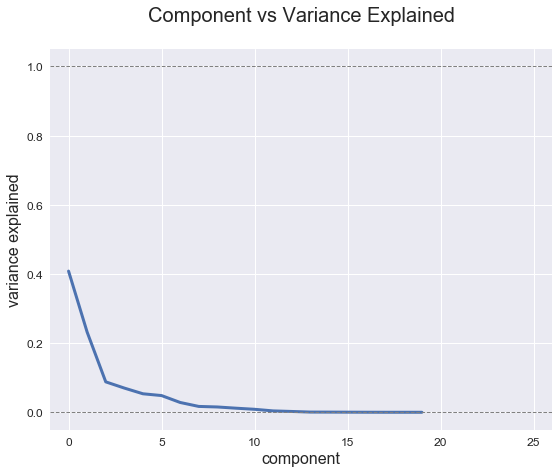

In [55]:
plt.figure(figsize=(9,7))

# HERE IS THE BASIC PLOT

# Plot the explained variance
component_number = range(len(var_exp_2))
plt.plot(component_number, var_exp_2, lw=3)

# NOW MAKE IT LOOK PRETTY

# Add horizontal lines at y=0 and y=100
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

# Set the x and y axis limits
ax = plt.gca()
ax.set_xlim([-1,26])
ax.set_ylim([-0.05,1.05])

# Label the axes
ax.set_ylabel('variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

# Make the tick labels bigger
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
# Add title
ax.set_title('Component vs Variance Explained\n', fontsize=20)

plt.show()

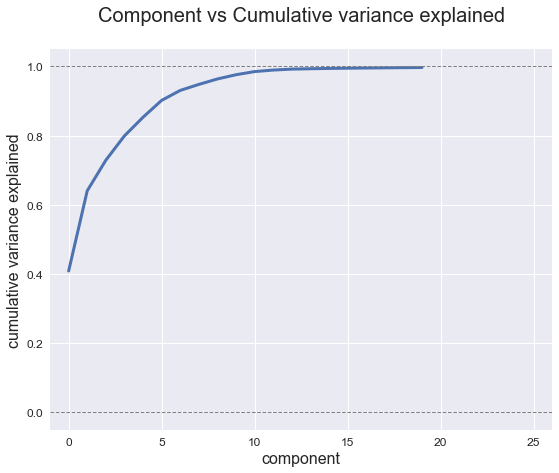

In [56]:
plt.figure(figsize=(9,7))

# HERE IS THE BASIC PLOT

# Plot the cumulative explained variance
component_number = range(len(cum_var_exp_2))
plt.plot(component_number, cum_var_exp_2, lw=3)

# NOW MAKE IT LOOK PRETTY

# Add horizontal lines at y=0 and y=100
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

# Set the x and y axis limits
ax = plt.gca()
ax.set_xlim([-1,26])
ax.set_ylim([-0.05,1.05])

# Label the axes
ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

# Make the tick labels bigger
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
# Add title
ax.set_title('Component vs Cumulative variance explained\n', fontsize=20)

plt.show()

### Neural Network 

In [57]:
# One hot encode y target
Y_train = to_categorical(y_train, 6)
Y_test = to_categorical(y_test, 6)

In [58]:
# Take a look at how the Y target looks
Y_train

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [59]:
# Construct a neural network
model = Sequential()

# input and hidden layers
model.add(Dense(50, activation='relu', input_dim=X_train_sc.shape[1]))
model.add(Dropout(0.5))

# For multiclass, same number of neurons as classes that we are predicting
# softmax activation function
model.add(Dense(6, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [60]:
nn = model.fit(X_train_sc, Y_train, epochs=30, validation_data=(X_test_sc, Y_test))

Train on 3051 samples, validate on 1017 samples
Epoch 1/30
3051/3051 [==============================] - 1s 186us/step - loss: 0.7967 - acc: 0.7594 - val_loss: 0.2726 - val_acc: 0.9469
Epoch 2/30
3051/3051 [==============================] - 0s 93us/step - loss: 0.1897 - acc: 0.9544 - val_loss: 0.1983 - val_acc: 0.9656
Epoch 3/30
3051/3051 [==============================] - 0s 99us/step - loss: 0.1067 - acc: 0.9738 - val_loss: 0.1741 - val_acc: 0.9725
Epoch 4/30
3051/3051 [==============================] - 0s 92us/step - loss: 0.0764 - acc: 0.9830 - val_loss: 0.1749 - val_acc: 0.9715
Epoch 5/30
3051/3051 [==============================] - 0s 94us/step - loss: 0.0606 - acc: 0.9862 - val_loss: 0.1708 - val_acc: 0.9695
Epoch 6/30
3051/3051 [==============================] - 0s 96us/step - loss: 0.0559 - acc: 0.9879 - val_loss: 0.1654 - val_acc: 0.9715
Epoch 7/30
3051/3051 [==============================] - 0s 95us/step - loss: 0.0387 - acc: 0.9921 - val_loss: 0.1636 - val_acc: 0.9695
Epoch 

In [61]:
model.predict(X_test_sc)

array([[2.5228058e-14, 5.7172218e-18, 1.0000000e+00, 7.8514826e-13,
        1.1524981e-18, 1.8150598e-16],
       [1.0000000e+00, 6.4798680e-11, 1.2313174e-14, 2.0826114e-13,
        2.8071703e-15, 2.3868706e-16],
       [2.2781621e-06, 1.3924346e-04, 9.9985814e-01, 9.6334787e-08,
        3.3954906e-10, 1.8393368e-07],
       ...,
       [5.0678034e-07, 2.8361913e-09, 1.3389128e-08, 9.9999952e-01,
        1.3686310e-09, 1.4999110e-09],
       [9.5613734e-17, 3.0166788e-15, 4.3282328e-17, 1.0000000e+00,
        1.3678276e-17, 1.0050059e-15],
       [6.8596948e-04, 9.9911207e-01, 3.3771391e-06, 2.3267894e-06,
        1.9392816e-04, 2.3245736e-06]], dtype=float32)

In [62]:
# index for the largest number from each row gives class prediction
model.predict(X_test_sc).argmax(axis=1)

array([2, 0, 2, ..., 3, 3, 1])

In [63]:
# nn.history

In [64]:
Y_test_classes = np.argmax(Y_test, axis=1)

In [65]:
Y_test_classes

array([2, 0, 2, ..., 3, 3, 1])

In [66]:
nn_preds = model.predict_classes(X_test_sc)

confusion_matrix(Y_test_classes, nn_preds)

array([[286,   4,   0,   1,   2,   1],
       [  1, 127,   0,   1,   0,   0],
       [  0,   1, 144,   1,   0,   0],
       [  2,   4,   1, 152,   1,   0],
       [  1,   5,   0,   0, 136,   0],
       [  0,   0,   0,   0,   0, 146]])

## Neural Network trained on PCA data

In [67]:
Z_train_2.shape

(3051, 20)

In [68]:
# Construct a neural network
model_Z = Sequential()

# input and hidden layers
model_Z.add(Dense(50, activation='relu', input_dim=Z_train_2.shape[1]))
model_Z.add(Dropout(0.5))

# For multiclass, same number of neurons as classes that we are predicting
# softmax activation function
model_Z.add(Dense(6, activation='softmax'))

# compile model
model_Z.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [69]:
nn_Z = model_Z.fit(Z_train_2, Y_train, epochs=30, validation_data=(Z_test_2, Y_test))

Train on 3051 samples, validate on 1017 samples
Epoch 1/30
3051/3051 [==============================] - 0s 102us/step - loss: 12.8797 - acc: 0.2009 - val_loss: 12.9959 - val_acc: 0.1937
Epoch 2/30
3051/3051 [==============================] - 0s 27us/step - loss: 12.8744 - acc: 0.2012 - val_loss: 12.9960 - val_acc: 0.1937
Epoch 3/30
3051/3051 [==============================] - 0s 27us/step - loss: 12.9219 - acc: 0.1983 - val_loss: 12.9960 - val_acc: 0.1937
Epoch 4/30
3051/3051 [==============================] - 0s 28us/step - loss: 12.6684 - acc: 0.2140 - val_loss: 12.9960 - val_acc: 0.1937
Epoch 5/30
3051/3051 [==============================] - 0s 27us/step - loss: 12.9127 - acc: 0.1986 - val_loss: 12.9008 - val_acc: 0.1996
Epoch 6/30
3051/3051 [==============================] - 0s 28us/step - loss: 12.7582 - acc: 0.2085 - val_loss: 12.7423 - val_acc: 0.2094
Epoch 7/30
3051/3051 [==============================] - 0s 29us/step - loss: 12.5680 - acc: 0.2203 - val_loss: 12.3636 - val_acc:

In [70]:
model_Z.predict(Z_test_2).argmax(axis=1)

array([3, 5, 0, ..., 3, 3, 0])

In [71]:
Y_test_classes_Z = np.argmax(Y_test, axis=1)
Y_test_classes_Z

array([2, 0, 2, ..., 3, 3, 1])

In [72]:
nn_preds_Z = model_Z.predict_classes(Z_test_2)

confusion_matrix(Y_test_classes_Z, nn_preds_Z)

array([[165,   9,   6,  74,  20,  20],
       [ 77,   6,   0,   3,   1,  42],
       [ 19,   1,   2, 104,  13,   7],
       [ 37,  14,   0,  94,   4,  11],
       [ 54,   3,   0,   3,   4,  78],
       [  0,   2,   0,  93,   0,  51]])